In [12]:
%pylab inline
import gzip
import numpy as np
import requests
from tqdm import trange
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
def load_img(filename,num_images):
    f = gzip.open(filename,'r')
    image_size=28
    f.read(16)
    buf = f.read(image_size*image_size*num_images)
    data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
    data = data.reshape(num_images, image_size, image_size)
    return data
def load_labels(filename, num_labels):
    f = gzip.open(filename,'r')
    f.read(8)
    buf = f.read(num_labels)
    labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
    return labels

In [3]:
train_size, test_size = 60000,10000
path_img_train = r'C:\Users\prank\Documents\fromScratch\MNIST\Data\train-images-idx3-ubyte.gz'
path_img_test = r'C:\Users\prank\Documents\fromScratch\MNIST\Data\t10k-images-idx3-ubyte.gz'
path_lbl_train = r'C:\Users\prank\Documents\fromScratch\MNIST\Data\train-labels-idx1-ubyte.gz'
path_lbl_test = r'C:\Users\prank\Documents\fromScratch\MNIST\Data\t10k-labels-idx1-ubyte.gz'

X_train,X_test = load_img(path_img_train, 60000), load_img(path_img_test, 10000)
Y_train, Y_test = load_labels(path_lbl_train, 60000), load_labels(path_lbl_test, 10000)

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        self.l1 = nn.Linear(784,128, bias=False)
        self.l2 = nn.Linear(128,10, bias=False)
        self.sm = nn.LogSoftmax(dim=1)
    def forward(self,x):
        x = F.relu(self.l1(x))
        x = self.l2(x)
        x = self.sm(x)
        return x

loss 0.20 accuracy 0.94: 100%|██████████| 1000/1000 [00:10<00:00, 95.68it/s]


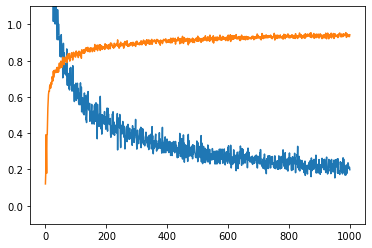

In [19]:
model = Model()
loss_function = nn.NLLLoss(reduction="none")
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0)

losses, accuracies = [],[]
BS=1024
for epoch in (t:=trange(1000)):
    samp = np.random.randint(0, X_train.shape[0], size=(BS))
    X = torch.tensor(X_train[samp].reshape(-1,28*28)).float()
    Y = torch.tensor(Y_train[samp]).long()
    model.zero_grad()
    out = model(X)
    preds = torch.argmax(out, dim=1)
    accuracy = (Y==preds).float().mean()
    loss = loss_function(out, Y).mean()
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    accuracies.append(accuracy.item())
    t.set_description("loss %.2f accuracy %.2f" % (loss, accuracy))

plt.ylim(-0.1, 1.1)
plot(losses)
plot(accuracies)


[5 0 4 ... 5 6 8]
